# **Lab 5: Quadrature**
**Edvin von Platen**

[**COLAB LINK**](https://colab.research.google.com/drive/1OV_0JpDL9A3d5JPUhaaXBgv6sAU_cKJ5)

# **Abstract**

In this lab we implement and evaluate different quadrature methods, numerical methods for integration. We implement the following methods:

  1. 2-point Gauss quadrature over a unit interval - Deterministic one dimensional rule.
  2. 3-point edge midpoint quadrature - Deterministic rule over a triangle.
  3. Monte Carlo quadrature over unit interval - Probabilistic one dimensional rule.
  4. Monte Carlo quadrature over reference triangle - Probablistic rule over a triangle.

The implementation of the methods appear to be sound and they perform as expected.

#**About the code**

In [0]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Edvin von Platen (edvinvp@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [0]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

In this report we implement and evaluate different *quadrature* methods, which are numerical methods to approximate integrals. To approximate an integral using quadrature, a quatrature rule is defined (11.2),
$$
\int_a^b f(x) dx \approx \sum_{i=0}^n f(x_i)w_i,
$$
the points $x_i \in [a,b]$ are known as quadrature points and $w_i \in R$ as the quadrature weights.

All materials reference are from the course [DD2363 Methods in Scientific Computing](https://kth.instructure.com/courses/17068) lecture notes.

# **Methods**

## **Gauss Quadrature**
Gauss quadrature rules are constructed such that it is exact for polynomial integrands of some degree, a rule of order $n$ is exact for polynomials of a certain degree $q$ or less.

Let $p\in P^q([a,b])$ and,
$$
p(x) = \sum_{i=0}^q c_i \varphi_i(x), \ \ x\in [a,b],
$$
where $\{\varphi_i(x)\}_{i=0}^q$ is a polynomial basis and $c_i$ the coordinates. As we want the rule to be exact for $p(x)$ we determine the quadrature points $x_i$ and their weights $w_i$ from,
$$
\sum_{j=0}^{n-1} p(x_j)w_j = \int_a^b p(x)dx,
$$
which is equivalent to solvíng (11.4),
$$
\sum_{j=0}^{n-1} \varphi_i(x_j)w_j = \int_a^b \varphi_i(x)dx, \ \ i = 0,...,q.
$$


### **2-Point Guass Quadrature over $[0,1]$**

Two point Guass quadrature rule is constructed to be exact for qubic polynomials, i.e. $p\in P^3([0,1])$ and,
$$
\int_0^1 p(x) = p(x_0)w_0 + p(x_1)w_1.
$$
We need to find the quadrature points $x_0$ and $x_1$, and the weights $w_0$ and $w_1$. Let $p(x) = c_3x^3 + c_2 x^2 + c_1x + c_0$, then,
$$
\int_0^1 p(x) = \frac{c_3}{4} + \frac{c_2}{3} + \frac{c_1}{2} +c_0.
$$
Expanding the first equation gives us,
\begin{align}
c_3(\frac{1}{4}-x_0^3w_0 - x_1^3w_1) + c_2(\frac{1}{3}-x_0^2w_0 - x_1^2w_1) +c_1(\frac{1}{2}-x_0w_0 - x_1w_1) +  c_0(1-w_0 - w_1) = 0.
\end{align}
With solutions,
\begin{align*}
& w_0 = \frac{1}{2}, \ w_1 = \frac{1}{2}, \ x_0 =\frac{1}{6}(3-\sqrt{3}),\ x_1 = \frac{1}{6}(3+\sqrt{3}), \ \text{and} \\
& w_0 = \frac{1}{2}, \ w_1 = \frac{1}{2}, \ x_0 =\frac{1}{6}(3+\sqrt{3}),\ x_1 = \frac{1}{6}(3-\sqrt{3}).
\end{align*}
We use the first in our implementation below.

In [0]:
def two_point_gauss_quadrature(f):
  x_0 = (1/6)*(3 - np.sqrt(3))
  x_1 = (1/6)*(3 + np.sqrt(3))
  return 0.5*f(x_0) + 0.5*f(x_1)

### **3-point edge midpoint quadrature over a reference triangle**
The 3-point edge midpoint quadrature rule is constructed to be exact for quadratic functions. Let $T$ be the reference triangle with vertices $(0,0),(1,0)$, and $(1,0)$. From example (11.5) the quadrature points are the midpoints of the edges, $x_0 = (0,5), \ x_1 = (0.5,0.5),\ x_2 = (0,0.5)$, and the weights are $w_0 = \frac{1}{6}, \ w_1 = \frac{1}{6}, \ w_2 = \frac{1}{6}$. 

We give an implementation of the quadrature rule below.

In [0]:
def three_point_edge_mid_quadrature(f):
  return (1/6)*(f(0,0.5) + f(0.5,0.5) + f(0.5,0))

Note that the analytical integral of a function over the reference triangle is given by,
$$
\int_T f(x,y) = \int_0^1 \int_0^{1-x} f(x,y)dxdy.
$$

### **Monte Carlo quadrature over a unit interval**

In contrast to the two deterministic methods implemented above, Monte Carlo methods are probabilistic (section 12.4). Let $g: D\to R,  \ \ D \subset R^d$ be the function which integral we want to approximate, the idea is to sample $n$ independent uniformly distributed random variables $X_i : \Omega \to D$ and approximate the expected value of $g$ using the sample mean $\bar{g} = \frac{1}{n} \sum_{i=1}^n g(x_i)$, since by the law of large numbers,
$$
\lim_{n\to\infty} \bar{g} = E(g).
$$
We can then approximate the integral,
$$
\int_D g(x)dx
$$
since
$$
E(g) = \frac{1}{|D|}\int_D g(x)dx.
$$
We give an implementation of Monte Carlo quadrature over a unit interval below, where $|D| = 1$.

In [0]:
def monte_carlo_quadrature(f, n):
  return np.sum(f(np.random.uniform(size=n))) / n

### **Monte Carlo quadrature over a reference triangle**

Monte Carlo quadrature over a reference triangle is very similar to the unit interval case. To sample uniformly from the reference triangle we use a uniform distribution over the unit square with the lower left corner at $(0,0)$ and accept the sample if it is located in the triangle. We also have that the area of the reference triangle is $|D| = \frac{1}{2}$.


In [0]:
def triangle_monte_carlo_quadrature(f, n):
  # Probably exists better ways to do this
  accepted = 0
  s = 0
  while accepted < n:
    # sample from unit square and accept if within triangle.
    x = np.random.uniform()
    y = np.random.uniform()
    if y < 1 - x:
      s += f(x,y)
      accepted += 1 
  return s/(2*n)

# **Results**

### **2-Point Gauss Quadrature over $[0,1]$**
2-Point Gauss quadrature should be exact for cubic polynomials, we test the implementation using the following two polynomials,
$$
p(x) = \frac{1}{2}x^3 - 4x + 3, \ \ q(x) = x^2 - \frac{1}{3}.
$$
Which have the exact integral values,
$$
\int_0^1 p(x) = 1.125, \ \ \int_0^1 q(x) = 0.
$$

In [13]:
p = lambda x: (1/2)*x**3 - 4*x + 3
q = lambda x: x**2 - 1/3
p_exact = 1.125
q_exact = 0
p_apx = two_point_gauss_quadrature(p)
q_apx = two_point_gauss_quadrature(q)
print(p_exact - p_apx)
print(q_exact - q_apx)

0.0
8.326672684688674e-17


The method appear to be exact for both polynomials.

### **3-point edge midpoint quadrature over a reference triangle**
3-Point edge midpoint quadrature over a reference triangle $T$ is exact for cubic polynomials, we test with the following two polynomials.
$$
p(x,y) = x^2 + y^2 - xy + x - y + 3, \ \  q(x,y) = x^2 - y^2.
$$
With the exact integral values,
$$
\int_0^1 \int_0^{1-x}p(x,y)dxdy = 1.625, \ \ \int_0^1 \int_0^{1-x}q(x,y)dxdy = 0.
$$

In [30]:
p = lambda x,y: x*x + y*y -x*y +x -y + 3
q = lambda x,y: x*x - y*y
p_exact = 1.625
q_exact = 0
p_apx = three_point_edge_mid_quadrature(p)
q_apx = three_point_edge_mid_quadrature(q)
print(p_exact - p_apx)
print(q_exact - q_apx)

0.0
0.0


The method appear to be exact for both polynomials.

### **Monte Carlo quadrature over a unit interval**
From Section 12.4 we know that Monte Carlo quadrature converges at a rate of $\frac{1}{\sqrt{n}}$. We demonstatrate this by plotting the function $h(n) = \frac{1}{\sqrt{n}}$ along with the absolute error of the exact integral and the approximation of,
$$
f(x) = e^x\sin x + x, \ \ \int_0^1 f(x) \approx 1.4093306736314.
$$

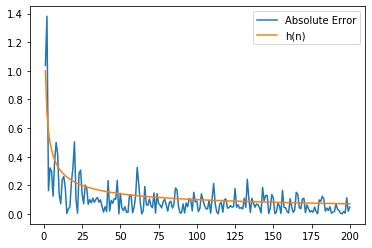

In [33]:
f = lambda x: np.exp(x)*np.sin(x) + x
m_f = lambda n: monte_carlo_quadrature(f, n)
n = np.linspace(1,200,num=200)
exact = 1.4093306736314
m = list(map(m_f, n.astype(int)))
err = list(map(lambda x: abs(x-exact), m))
sqrt_n = list(map(lambda x: 1/np.sqrt(x), n))
plt.plot(n, err, label="Absolute Error")
plt.plot(n,sqrt_n, label="h(n)")
plt.legend(loc="upper right")

The absolute error appear to follow the curve quite nicely. We also test one of the polynomials from the Guass quadrature,
$$
p(x) = \frac{1}{2}x^3 - 4x + 3.
$$

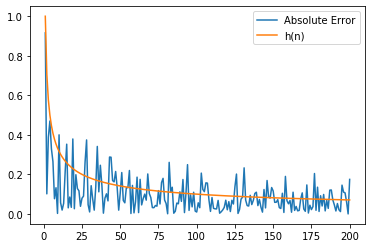

In [34]:
p = lambda x: (1/2)*x**3 - 4*x + 3
p_exact = 1.125
p_m =  lambda n: monte_carlo_quadrature(p, n)
n = np.linspace(1,200,num=200)
m = list(map(p_m, n.astype(int)))
err = list(map(lambda x: abs(x-p_exact), m))
sqrt_n = list(map(lambda x: 1/np.sqrt(x), n))
plt.plot(n, err, label="Absolute Error")
plt.plot(n,sqrt_n, label="h(n)")
plt.legend(loc="upper right")

### **Monte Carlo quadrature over a reference triangle**
The convergence rate of Monte Carlo quadrature is independent of the dimension of the function. We illustrate by plotting the absolute error along with the convergence rate for,
$$
f(x,y) = x^2 - y^2
$$
and
$$
 g(x,y) = e^x - sin(x) + cos(y)x^2y^2 + 10, \ \ \int_0^1\int_0^{1-x}g(x,y) \approx 2.2314.
$$


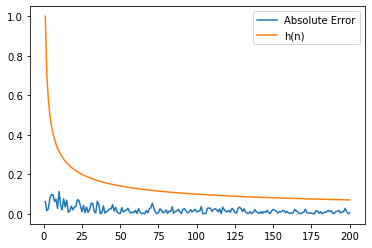

In [35]:
f = lambda x, y: x*x - y*y
m_f = lambda n: triangle_monte_carlo_quadrature(f, n)
n = np.linspace(1,200,num=200)
exact = three_point_edge_mid_quadrature(f) # 0.0
m = list(map(m_f, n.astype(int)))
err = list(map(lambda x: abs(x-exact), m))
sqrt_n = list(map(lambda x: 1/np.sqrt(x), n))
plt.plot(n, err, label="Absolute Error")
plt.plot(n,sqrt_n, label="h(n)")
plt.legend(loc="upper right")

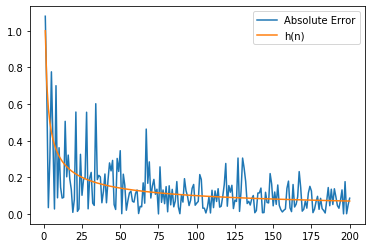

In [36]:
g = lambda x, y: np.exp(x) - np.sin(x) + 10*np.cos(y)*x*x*y*y + 10*x
m_f = lambda n: triangle_monte_carlo_quadrature(g, n)
n = np.linspace(1,200,num=200)
exact = 2.2314
m = list(map(m_f, n.astype(int)))
err = list(map(lambda x: abs(x-exact), m))
sqrt_n = list(map(lambda x: 1/np.sqrt(x), n))
plt.plot(n, err, label="Absolute Error")
plt.plot(n,sqrt_n, label="h(n)")
plt.legend(loc="upper right")

# **Discussion**

Both deterministic quadrature methods appear to be working as expected, and their implementation was straightforward.

The convergence rate of the two Monte Carlo methods appear to follow the $\frac{1}{\sqrt{n}}$ curve. 

While Monte Carlo methods converge in the limit they require $n$ function evaluations and the sampling of $n$ points, while the two deterministic methods only require $2$ or $3$ function evaluations.